In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [8]:
df = pd.read_csv("user_journey.csv")

In [13]:
df.shape

(14470, 51)

In [18]:
df.describe()

,Event_SoID,Event_SessionKey,TrackingEventID,SessionRank,SessionRankNoModals,CuID,LoginStatusFlag,ModalClick,EventType,Event_MkcID,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
count,14470.0,1.447000e+04,1.447000e+04,14470.000000,14470.000000,1.447000e+04,14470.000000,14470.0,0.0,14470.000000,...,12619.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,0.0,0.0,8.929000e+03,8.632000e+03
mean,49.0,7.485977e+15,4.010186e+18,196.090048,19.636835,-9.344024e+17,5.700138,0.0,NaN,46.543331,...,105.254854,0.831168,0.194955,0.081479,0.067243,15.153290,NaN,NaN,5.073732e+03,2.216582e+03
std,0.0,4.329861e+15,2.920239e+18,359.713914,28.529586,2.124161e+18,5.195214,0.0,NaN,43.446457,...,537.461961,0.374616,0.396180,0.273579,0.250450,70.118818,NaN,NaN,1.816418e+04,1.857169e+04
min,49.0,5.293304e+12,5.293304e+12,1.000000,1.000000,-9.203857e+18,0.000000,0.0,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,4.790000e+02,9.800000e+01
25%,49.0,3.957042e+15,1.276605e+18,9.000000,3.000000,3.079539e+08,0.000000,0.0,NaN,6.000000,...,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.577000e+03,1.128000e+03
50%,49.0,7.684644e+15,3.943165e+18,68.000000,10.000000,3.786200e+09,3.000000,0.0,NaN,31.000000,...,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.551000e+03,1.505500e+03
75%,49.0,1.112309e+16,6.554861e+18,237.000000,24.000000,5.008689e+09,11.000000,0.0,NaN,62.000000,...,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,4.869000e+03,2.109000e+03
max,49.0,1.479767e+16,9.222575e+18,3848.000000,256.000000,5.422569e+09,13.000000,0.0,NaN,135.000000,...,11957.000000,1.000000,1.000000,1.000000,1.000000,873.210000,NaN,NaN,1.428558e+06,1.688280e+06


### 1. Total visits by landing page type
(Hint: Landing page is defined as the first page a user visit within the session i.e. Sessionranknomodal =1) 


In [20]:
df.head(5)

,SessionStartDate,Event_SoID,Event_SessionKey,TrackingEventID,Event_Timestamp,SessionRank,SessionRankNoModals,Event_BrowserGuID,CuID,VisitorType,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
0,2020-02-29,49,5.293304e+12,5.293304e+12,2020-02-29 14:56:27,1,1,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,32.0,1,0,0,0,0.00,NaN,NaN,3457.0,2165.0
1,2020-02-29,49,5.293304e+12,7.203271e+18,2020-02-29 14:56:59,3,2,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,NaN,1,0,0,0,0.00,NaN,NaN,3679.0,2574.0
2,2020-02-29,49,2.152263e+13,2.152263e+13,2020-02-29 12:50:50,1,1,23F584C2-5E5A-A472-26B4-0BE52F9EF202,5310190262,Returning Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,6007.0,3934.0
3,2020-02-29,49,3.002755e+13,3.002755e+13,2020-02-29 1:43:50,1,1,23F7265C-5E5A-0821-54C9-0C1624E3CC02,-481848622244162661,New Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,4328.0,2522.0
4,2020-02-29,49,3.940757e+13,3.940757e+13,2020-02-29 20:30:25,1,1,A2D0206F-5C8E-E0C2-2321-71CF20786702,4777486105,Activated Customer,...,1.0,1,1,1,1,90.71,NaN,NaN,5040.0,2542.0


In [37]:
df.columns  #show column names in a dataframe

Index(['SessionStartDate', 'Event_SoID', 'Event_SessionKey', 'TrackingEventID',
       'Event_Timestamp', 'SessionRank', 'SessionRankNoModals',
       'Event_BrowserGuID', 'CuID', 'VisitorType', 'MarketingVisitorType',
       'LoginStatusFlag', 'Event_PageType', 'ModalClick', 'EventType',
       'Event_MkcID', 'Event_PrSKU', 'AddToCartSKU', 'RemoveFromCartSKU',
       'AddToIdeaBoardsSKU', 'CaID', 'ClID', 'PSEventID', 'SolrEventID',
       'SearchTerm', 'Event_Url', 'Event_UrlCleaned', 'Event_RefererUrl',
       'Event_RefererUrlCleaned', 'Platform', 'DeviceType', 'BrowserName',
       'OSName', 'AppVersion', 'Channel', 'CmCode', 'NavigationType',
       'NavigationPriorRank', 'NavigationPriorPageType', 'ClickLocation',
       'Exit', 'SecondsToNextPageView', 'RemainingVisitHasProductView',
       'RemainingVisitHasAddToCart', 'RemainingVisitHasCheckoutView',
       'ConvertedSession', 'SessionRevenue', 'OrID', 'GrossRevenueStable',
       'TotalPageLoadTime', 'SpeedIndex'],
      dtyp

In [69]:
# a dataframe that stores only rows of the first step of each session
landing = df[df['SessionRankNoModals'] == 1] #keeping rows with Landing page only
landing.head(2)

,SessionStartDate,Event_SoID,Event_SessionKey,TrackingEventID,Event_Timestamp,SessionRank,SessionRankNoModals,Event_BrowserGuID,CuID,VisitorType,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
0,2020-02-29,49,5.293304e+12,5.293304e+12,2020-02-29 14:56:27,1,1,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,32.0,1,0,0,0,0.0,NaN,NaN,3457.0,2165.0
2,2020-02-29,49,2.152263e+13,2.152263e+13,2020-02-29 12:50:50,1,1,23F584C2-5E5A-A472-26B4-0BE52F9EF202,5310190262,Returning Visitor,...,NaN,1,0,0,0,0.0,NaN,NaN,6007.0,3934.0


In [71]:
landing.shape # Find the total number of visits 

(1853, 51)

In [136]:
# a data frame to store total visits by landing page types

visit_by_landing = landing[['Event_PageType','Event_SessionKey']].groupby('Event_PageType').count() 

In [137]:
visit_by_landing.columns = ['Number of visits/sessions'] 
visit_by_landing.index.names = ['Landing_PageType'] #change the name of the index of a df

visit_by_landing.head(5)

,Number of visits/sessions
Landing_PageType,
ABOUTUSCONTACTUS,1
ACCOUNTEMAILPREFERENCES,9
ACCOUNTLOGIN,7
ACCOUNTMYACCOUNT,3
APPMARKETING,1


Text(0.5, 1.0, 'Total of visits by landing page types')

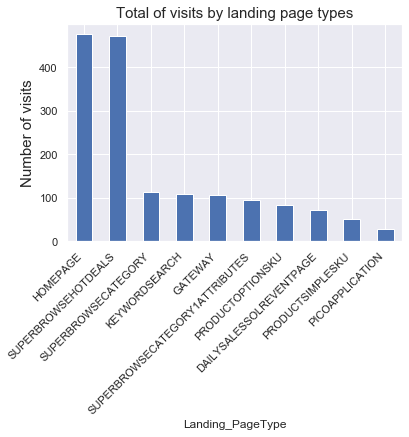

In [132]:
plot = visit_by_landing.sort_values(by = 'Number of visits/sessions', ascending = 0).head(10).plot(kind = 'bar',legend = None)
plt.ylabel('Number of visits', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total of visits by landing page types', fontsize = 15)

### 2. Conversion rate by landing pages type
- (Conversion Rate = Total Converted/ Total Visits)
- For example, if an ecommerce site receives 200 visitors in a month and has 50 sales, the conversion rate would be 50 divided by 200, or 25%. A conversion can refer to any desired action that you want the user to take.


- Converted Session =1 indicates that a user places an order between the current click and the end of their visit. 
- Converted Session =1 will show up from the very beginning of the current session and ends at Event_PageType = “CHECKOUTONEPAGE”
- SessionRevenue is the sum of revenue for the whole session (stay the same from the beginning to CHECKOUTONEPAGE step)


In [95]:
landing[['Event_PageType','ConvertedSession']]

,Event_PageType,ConvertedSession
0,SUPERBROWSECATEGORY2ATTRIBUTES,0
2,PRODUCTKIT,0
3,SUPERBROWSEHOTDEALS,0
4,DAILYSALESSOLREVENTPAGE,1
27,CONTENTIDEASADVICE,0
...,...,...
14373,GATEWAY,0
14412,HOMEPAGE,0
14459,PRODUCTSIMPLESKU,0
14460,SUPERBROWSEHOTDEALS,0


In [115]:
# a df to store the total converted sessions by landing page types
converted_total = landing[['Event_PageType','ConvertedSession']].groupby('Event_PageType').sum(axis = 1, skipna = True)
converted_total.index.names = ['Landing_PageType']
converted_total.columns = ['Total Converted']
converted_total.sort_values(by = 'Total Converted',ascending = 0).head(5)

,Total Converted
Landing_PageType,
HOMEPAGE,18
SUPERBROWSEHOTDEALS,9
SUPERBROWSECATEGORY1ATTRIBUTES,4
PRODUCTOPTIONSKU,4
CHECKOUTBASKET,3


In [127]:
converted_total['Conversion rate'] = converted_total['Total Converted']/visit_by_landing['Number of visits/sessions']
converted_total[converted_total['Conversion rate'] != 0].sort_values(by='Conversion rate', ascending = 0)

,Total Converted,Conversion rate
Landing_PageType,,
CHECKOUTONEPAGE,1,1.000000
GENERAL,2,0.500000
ACCOUNTMYACCOUNT,1,0.333333
CHECKOUTBASKET,3,0.142857
PRODUCTOPTIONSKU,4,0.047619
SUPERBROWSECATEGORY1ATTRIBUTES,4,0.041667
HOMEPAGE,18,0.037815
PICOAPPLICATION,1,0.035714
SUPERBROWSECATEGORY,3,0.026549


* Interesting point: Landing page can be the CHECKOUTONEPAGE.

Text(0.5, 1.0, 'Conversion rate by landing page types')

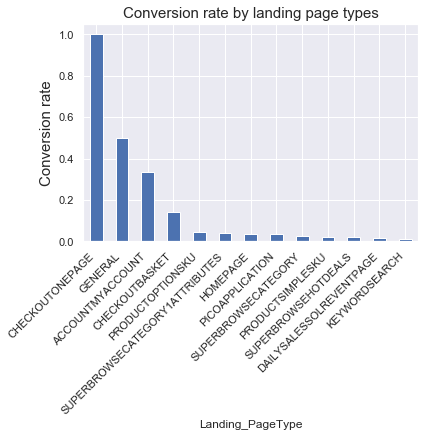

In [134]:
plot = converted_total[['Conversion rate']][converted_total['Conversion rate'] != 0].sort_values(by='Conversion rate', ascending = 0).plot(kind = 'bar', legend = None)
plt.ylabel('Conversion rate', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Conversion rate by landing page types', fontsize = 15)

### 3. What are next pages do users navigate to after landing on Homepage? Order by total of visits and conversion rate
- assume that "landing" here means step 1 of the session is to land at HOMEPAGE

In [152]:
# a dataframe to store the below information for the 2nd step of the session after landing on Homepage

home_next_page = df[['Event_SessionKey','Event_PageType','ConvertedSession']][df['SessionRankNoModals'] == 2][df['NavigationPriorPageType'] == 'HOMEPAGE']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [153]:
home_next_page.head(5)

,Event_SessionKey,Event_PageType,ConvertedSession
92,9.891623e+13,KEYWORDSEARCH,0
102,1.024284e+14,CHECKOUTBASKET,0
169,2.077754e+14,CATEGORYSTANDARD,0
176,2.094783e+14,CATEGORYDEPARTMENT,0
268,3.698195e+14,CATEGORYDEPARTMENT,1


In [171]:
# sort the types of next page after landing on HOMEPAGE based on total visits
visit_after_home = home_next_page[['Event_PageType','Event_SessionKey']].groupby('Event_PageType').count()
visit_after_home.columns = ['Total visits']
visit_after_home.sort_values(by="Total visits", ascending = 0)

,Total visits
Event_PageType,
CATEGORYDEPARTMENT,53
SUPERBROWSECATEGORY,45
CATEGORYSTANDARD,26
KEYWORDSEARCH,25
SUPERBROWSECATEGORY1ATTRIBUTES,19
DAILYSALESEVENTPAGE,18
CHECKOUTBASKET,17
ACCOUNTLOGIN,14
PRODUCTSIMPLESKU,10


Text(0.5, 1.0, 'Next page after landing on HOMEPAGE, ranked by total visits')

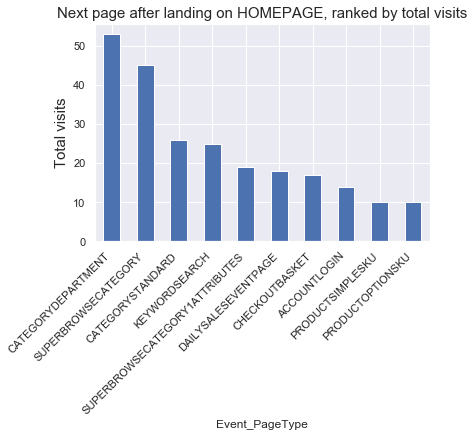

In [174]:
plot = visit_after_home.sort_values(by = 'Total visits', ascending = 0).head(10).plot(kind = 'bar',legend = None)
plt.ylabel('Total visits', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Next page after landing on HOMEPAGE, ranked by total visits', fontsize = 15)

In [167]:
# Find the total of converted session by the next page type
converted_2 = home_next_page[['Event_PageType','ConvertedSession']].groupby('Event_PageType').sum(axis = 1, skipna = True)
converted_2.head(2)

,ConvertedSession
Event_PageType,
ACCOUNTLOGIN,2
ACCOUNTMYACCOUNT,1


In [173]:
converted_2['Conversion rate'] = converted_2['ConvertedSession']/visit_after_home['Total visits']
converted_2.columns = ['Total Converted', 'Conversion rate']
converted_2.sort_values(by='Conversion rate', ascending = 0)

,Total Converted,Conversion rate
Event_PageType,,
SUPERBROWSECATEGORY1ATTRIBUTES,4,0.210526
BOARDYOUROWN,1,0.166667
ACCOUNTLOGIN,2,0.142857
DAILYSALESEVENTPAGE,2,0.111111
ACCOUNTMYACCOUNT,1,0.111111
PRODUCTOPTIONSKU,1,0.100000
CATEGORYDEPARTMENT,4,0.075472
CHECKOUTBASKET,1,0.058824
KEYWORDSEARCH,1,0.040000


Text(0.5, 1.0, 'Next page after landing on HOMEPAGE, ranked by conversion rate')

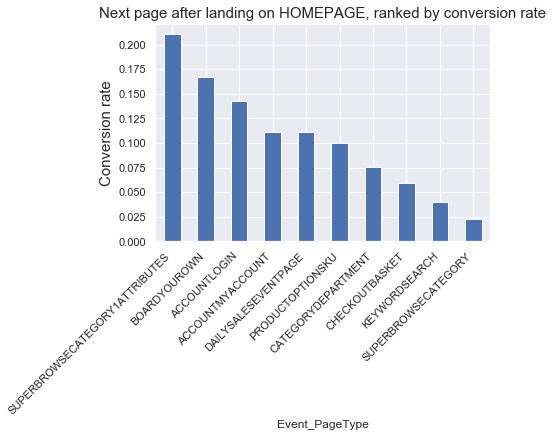

In [176]:
plot = converted_2[['Conversion rate']][converted_2['Conversion rate'] != 0].sort_values(by='Conversion rate', ascending = 0).plot(kind = 'bar', legend = None)
plt.ylabel('Conversion rate', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Next page after landing on HOMEPAGE, ranked by conversion rate', fontsize = 15)

**Good question to answer: Total SessionRevenue by Channel/Landing page types/OSName**